In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    recall_score,
    precision_score,
    f1_score,
    make_scorer,
    confusion_matrix, 
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

 # Data Preparation  

## Load Data

In [5]:
# Load data
npz = np.load('./my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

## Preprocess data

In [7]:
# Split data into train and valid set
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_raw, y_raw, 
                                                      shuffle=True, test_size=0.25, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_org.shape, y_train_org.shape))
print("Test data shape, X_test.shape:{} y_test.shape:{}".format(X_test_org.shape, y_test_org.shape))

Train data shape, X_train.shape:(34107, 28, 28) y_train.shape:(34107,)
Test data shape, X_test.shape:(11370, 28, 28) y_test.shape:(11370,)


In [9]:
# Scale X data into range 0.0 to 1.0
X_train = (X_train_org / 255.).reshape(-1, 28*28)
X_test  = (X_test_org  / 255.).reshape(-1, 28*28)
y_train = y_train_org.copy().reshape(-1,1)
y_test  = y_test_org.copy().reshape(-1,1)

# First Grid Search

In [71]:
# Estimator
logistic_reg = LogisticRegression()

# Parameters
params_v1 = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0],
}

# Gridsearch and Validation options
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score, average="micro"),
    "presicison": make_scorer(precision_score, average="micro"),
    "f1": make_scorer(f1_score, average="micro"),
}

cv = 5
refit = False
return_train_score = True
verbose = 3

In [72]:
grid_search_v1 = GridSearchCV(
                    logistic_reg,
                    params_v1,
                    scoring = scoring,
                    cv = cv,
                    refit = refit,
                    return_train_score = return_train_score,
                    verbose = verbose)

In [73]:
grid_search_v1.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l1, accuracy=0.8596336996336996, recall=0.8596336996336996, presicison=0.8596336996336996, f1=0.8596336996336996, total=   6.9s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l1, accuracy=0.8601992966002344, recall=0.8601992966002344, presicison=0.8601992966002344, f1=0.8601992966002344, total=   6.5s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.1s remaining:    0.0s
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l1, accuracy=0.8587131760222776, recall=0.8587131760222776, presicison=0.8587131760222776, f1=0.8587131760222776, total=   5.6s
[CV] C=0.01, penalty=l1 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l1, accuracy=0.8573104560786039, recall=0.8573104560786039, presicison=0.8573104560786039, f1=0.8573104560786039, total=   6.5s
[CV] C=0.01, penalty=l1 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l1, accuracy=0.8708920187793427, recall=0.8708920187793427, presicison=0.8708920187793427, f1=0.8708920187793427, total=   6.9s
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l2, accuracy=0.9010989010989011, recall=0.9010989010989011, presicison=0.9010989010989011, f1=0.9010989010989011, total=  12.8s
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l2, accuracy=0.8985932004689332, recall=0.8985932004689332, presicison=0.8985932004689332, f1=0.8985932004689332, total=  14.2s
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l2, accuracy=0.8968195808295472, recall=0.8968195808295472, presicison=0.8968195808295472, f1=0.8968195808295472, total=  13.2s
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l2, accuracy=0.8951459158234345, recall=0.8951459158234345, presicison=0.8951459158234345, f1=0.8951459158234345, total=  13.9s
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, penalty=l2, accuracy=0.9075704225352113, recall=0.9075704225352113, presicison=0.9075704225352113, f1=0.9075704225352113, total=  12.7s
[CV] C=0.1, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l1, accuracy=0.9049084249084249, recall=0.9049084249084249, presicison=0.9049084249084249, f1=0.9049084249084249, total=  13.5s
[CV] C=0.1, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l1, accuracy=0.9057737397420867, recall=0.9057737397420867, presicison=0.9057737397420867, f1=0.9057737397420867, total=  15.6s
[CV] C=0.1, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l1, accuracy=0.9010699105965118, recall=0.9010699105965118, presicison=0.9010699105965118, f1=0.9010699105965118, total=  15.2s
[CV] C=0.1, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l1, accuracy=0.9020384220560199, recall=0.9020384220560199, presicison=0.9020384220560199, f1=0.9020384220560199, total=  17.1s
[CV] C=0.1, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l1, accuracy=0.9141725352112676, recall=0.9141725352112676, presicison=0.9141725352112676, f1=0.9141725352112676, total=  14.9s
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l2, accuracy=0.9128205128205128, recall=0.9128205128205128, presicison=0.9128205128205128, f1=0.9128205128205128, total=  22.5s
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l2, accuracy=0.9111957796014069, recall=0.9111957796014069, presicison=0.9111957796014069, f1=0.9111957796014069, total=  21.5s
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l2, accuracy=0.909277443939616, recall=0.909277443939616, presicison=0.909277443939616, f1=0.909277443939616, total=  21.6s
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l2, accuracy=0.9084909810822701, recall=0.9084909810822701, presicison=0.9084909810822701, f1=0.9084909810822701, total=  22.7s
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.1, penalty=l2, accuracy=0.9181338028169014, recall=0.9181338028169014, presicison=0.9181338028169014, f1=0.9181338028169013, total=  20.7s
[CV] C=0.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l1, accuracy=0.9132600732600733, recall=0.9132600732600733, presicison=0.9132600732600733, f1=0.9132600732600733, total=  17.9s
[CV] C=0.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l1, accuracy=0.9117819460726846, recall=0.9117819460726846, presicison=0.9117819460726846, f1=0.9117819460726846, total=  19.7s
[CV] C=0.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l1, accuracy=0.9127949582295178, recall=0.9127949582295178, presicison=0.9127949582295178, f1=0.9127949582295178, total=  19.4s
[CV] C=0.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l1, accuracy=0.9101041208388326, recall=0.9101041208388326, presicison=0.9101041208388326, f1=0.9101041208388326, total=  18.8s
[CV] C=0.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l1, accuracy=0.9187206572769953, recall=0.9187206572769953, presicison=0.9187206572769953, f1=0.9187206572769953, total=  18.1s
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l2, accuracy=0.9117948717948718, recall=0.9117948717948718, presicison=0.9117948717948718, f1=0.9117948717948718, total=  34.3s
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l2, accuracy=0.9101699882766706, recall=0.9101699882766706, presicison=0.9101699882766706, f1=0.9101699882766706, total=  34.3s
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l2, accuracy=0.9117690165616298, recall=0.9117690165616298, presicison=0.9117690165616298, f1=0.9117690165616298, total=  36.7s
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l2, accuracy=0.9096641736324974, recall=0.9096641736324974, presicison=0.9096641736324974, f1=0.9096641736324974, total=  35.6s
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.5, penalty=l2, accuracy=0.9172535211267606, recall=0.9172535211267606, presicison=0.9172535211267606, f1=0.9172535211267606, total=  35.2s
[CV] C=1.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l1, accuracy=0.912967032967033, recall=0.912967032967033, presicison=0.912967032967033, f1=0.9129670329670331, total=  26.8s
[CV] C=1.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l1, accuracy=0.9120750293083235, recall=0.9120750293083235, presicison=0.9120750293083235, f1=0.9120750293083235, total=  25.9s
[CV] C=1.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l1, accuracy=0.9132346475157556, recall=0.9132346475157556, presicison=0.9132346475157556, f1=0.9132346475157554, total=  26.3s
[CV] C=1.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l1, accuracy=0.9115706115266168, recall=0.9115706115266168, presicison=0.9115706115266168, f1=0.9115706115266168, total=  24.1s
[CV] C=1.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l1, accuracy=0.9169600938967136, recall=0.9169600938967136, presicison=0.9169600938967136, f1=0.9169600938967136, total=  26.8s
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l2, accuracy=0.9098901098901099, recall=0.9098901098901099, presicison=0.9098901098901099, f1=0.9098901098901099, total=  41.4s
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l2, accuracy=0.9098769050410317, recall=0.9098769050410317, presicison=0.9098769050410317, f1=0.9098769050410317, total=  39.2s
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l2, accuracy=0.9101568225120914, recall=0.9101568225120914, presicison=0.9101568225120914, f1=0.9101568225120914, total=  42.6s
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l2, accuracy=0.9092242264261622, recall=0.9092242264261622, presicison=0.9092242264261622, f1=0.9092242264261622, total=  51.5s
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, penalty=l2, accuracy=0.9166666666666666, recall=0.9166666666666666, presicison=0.9166666666666666, f1=0.9166666666666666, total=  50.7s
[CV] C=1.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l1, accuracy=0.9104761904761904, recall=0.9104761904761904, presicison=0.9104761904761904, f1=0.9104761904761904, total=  31.4s
[CV] C=1.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l1, accuracy=0.9104630715123095, recall=0.9104630715123095, presicison=0.9104630715123095, f1=0.9104630715123097, total=  33.2s
[CV] C=1.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l1, accuracy=0.9117690165616298, recall=0.9117690165616298, presicison=0.9117690165616298, f1=0.9117690165616298, total=  30.3s
[CV] C=1.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l1, accuracy=0.9093708754949406, recall=0.9093708754949406, presicison=0.9093708754949406, f1=0.9093708754949406, total=  30.7s
[CV] C=1.5, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l1, accuracy=0.914906103286385, recall=0.914906103286385, presicison=0.914906103286385, f1=0.914906103286385, total=  30.0s
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l2, accuracy=0.9091575091575091, recall=0.9091575091575091, presicison=0.9091575091575091, f1=0.9091575091575091, total=  47.3s
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l2, accuracy=0.9084114888628371, recall=0.9084114888628371, presicison=0.9084114888628371, f1=0.9084114888628371, total=  48.1s
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l2, accuracy=0.9097171332258537, recall=0.9097171332258537, presicison=0.9097171332258537, f1=0.9097171332258537, total=  47.7s
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l2, accuracy=0.909517524563719, recall=0.909517524563719, presicison=0.909517524563719, f1=0.909517524563719, total=  48.3s
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.5, penalty=l2, accuracy=0.9160798122065728, recall=0.9160798122065728, presicison=0.9160798122065728, f1=0.9160798122065728, total=  50.4s
[CV] C=2.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l1, accuracy=0.9087179487179488, recall=0.9087179487179488, presicison=0.9087179487179488, f1=0.9087179487179488, total=  34.2s
[CV] C=2.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l1, accuracy=0.9103165298944901, recall=0.9103165298944901, presicison=0.9103165298944901, f1=0.9103165298944901, total=  34.8s
[CV] C=2.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l1, accuracy=0.9113293272753921, recall=0.9113293272753921, presicison=0.9113293272753921, f1=0.9113293272753921, total=  40.4s
[CV] C=2.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l1, accuracy=0.9081976829447133, recall=0.9081976829447133, presicison=0.9081976829447133, f1=0.9081976829447133, total=  34.1s
[CV] C=2.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l1, accuracy=0.9151995305164319, recall=0.9151995305164319, presicison=0.9151995305164319, f1=0.9151995305164319, total=  32.6s
[CV] C=2.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l2, accuracy=0.9093040293040293, recall=0.9093040293040293, presicison=0.9093040293040293, f1=0.9093040293040293, total=  49.8s
[CV] C=2.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l2, accuracy=0.9082649472450176, recall=0.9082649472450176, presicison=0.9082649472450176, f1=0.9082649472450176, total=  48.1s
[CV] C=2.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l2, accuracy=0.909277443939616, recall=0.909277443939616, presicison=0.909277443939616, f1=0.909277443939616, total=  48.5s
[CV] C=2.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l2, accuracy=0.9090775773573838, recall=0.9090775773573838, presicison=0.9090775773573838, f1=0.9090775773573838, total=  51.5s
[CV] C=2.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.0, penalty=l2, accuracy=0.9153462441314554, recall=0.9153462441314554, presicison=0.9153462441314554, f1=0.9153462441314554, total=  53.0s
[CV] C=3.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l1, accuracy=0.9078388278388279, recall=0.9078388278388279, presicison=0.9078388278388279, f1=0.9078388278388279, total=  36.8s
[CV] C=3.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l1, accuracy=0.9094372801875733, recall=0.9094372801875733, presicison=0.9094372801875733, f1=0.9094372801875733, total=  39.0s
[CV] C=3.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l1, accuracy=0.9098636963212663, recall=0.9098636963212663, presicison=0.9098636963212663, f1=0.9098636963212663, total=  35.9s
[CV] C=3.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l1, accuracy=0.9062912450505939, recall=0.9062912450505939, presicison=0.9062912450505939, f1=0.9062912450505939, total=  38.7s
[CV] C=3.0, penalty=l1 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l1, accuracy=0.9141725352112676, recall=0.9141725352112676, presicison=0.9141725352112676, f1=0.9141725352112676, total=  36.8s
[CV] C=3.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l2, accuracy=0.9073992673992674, recall=0.9073992673992674, presicison=0.9073992673992674, f1=0.9073992673992674, total=  59.9s
[CV] C=3.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l2, accuracy=0.9072391559202814, recall=0.9072391559202814, presicison=0.9072391559202814, f1=0.9072391559202814, total=  55.9s
[CV] C=3.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l2, accuracy=0.909277443939616, recall=0.909277443939616, presicison=0.909277443939616, f1=0.909277443939616, total=  54.9s
[CV] C=3.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l2, accuracy=0.9080510338759349, recall=0.9080510338759349, presicison=0.9080510338759349, f1=0.9080510338759348, total=  59.4s
[CV] C=3.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=3.0, penalty=l2, accuracy=0.914612676056338, recall=0.914612676056338, presicison=0.914612676056338, f1=0.914612676056338, total= 1.0min


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 37.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring={'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score, average=micro), 'presicison': make_scorer(precision_score, average=micro), 'f1': make_scorer(f1_score, average=micro)},
       verbose=3)

In [74]:
grid_search_v1.cv_results_

{'mean_fit_time': array([ 6.40275, 13.26757, 15.15446, 21.73977, 18.68572, 35.1286 ,
        25.894  , 44.9488 , 31.03691, 48.10972, 35.10449, 50.10195,
        37.35978, 58.13746]),
 'std_fit_time': array([0.46813, 0.58222, 1.18707, 0.72451, 0.70794, 0.90468, 0.99004,
        5.01713, 1.15227, 0.79908, 2.64424, 1.83815, 1.17476, 2.35973]),
 'mean_score_time': array([0.08463, 0.08674, 0.09611, 0.08292, 0.08941, 0.08709, 0.09422,
        0.11987, 0.08147, 0.24213, 0.10492, 0.08464, 0.08607, 0.08884]),
 'std_score_time': array([0.00779, 0.00396, 0.02098, 0.01534, 0.0194 , 0.01098, 0.01574,
        0.03257, 0.00495, 0.29899, 0.04393, 0.00902, 0.01075, 0.01063]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 0.5, 0.5, 1.0, 1.0, 1.5, 1.5,
                    2.0, 2.0, 3.0, 3.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty':

In [83]:
params = grid_search_v1.cv_results_['params']
accuracy_list = grid_search_v1.cv_results_['mean_test_accuracy']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list.append(param)

In [84]:
result_list

[{'C': 0.01, 'penalty': 'l1', 'test_acc': 0.8613481103585774},
 {'C': 0.01, 'penalty': 'l2', 'test_acc': 0.8998446066789808},
 {'C': 0.1, 'penalty': 'l1', 'test_acc': 0.9055912276072361},
 {'C': 0.1, 'penalty': 'l2', 'test_acc': 0.9119828774151933},
 {'C': 0.5, 'penalty': 'l1', 'test_acc': 0.9133315741636614},
 {'C': 0.5, 'penalty': 'l2', 'test_acc': 0.9121294748878529},
 {'C': 1.0, 'penalty': 'l1', 'test_acc': 0.9133608936581933},
 {'C': 1.0, 'penalty': 'l2', 'test_acc': 0.9111619315682997},
 {'C': 1.5, 'penalty': 'l1', 'test_acc': 0.911396487524555},
 {'C': 1.5, 'penalty': 'l2', 'test_acc': 0.9105755416776615},
 {'C': 2.0, 'penalty': 'l1', 'test_acc': 0.910751458644853},
 {'C': 2.0, 'penalty': 'l2', 'test_acc': 0.9102530272378104},
 {'C': 3.0, 'penalty': 'l1', 'test_acc': 0.9095200398745126},
 {'C': 3.0, 'penalty': 'l2', 'test_acc': 0.9093148034127891}]

In [86]:
df_result_v1 = pd.DataFrame(result_list)

In [87]:
df_result_v1

,C,penalty,test_acc
0,0.01,l1,0.861348
1,0.01,l2,0.899845
2,0.10,l1,0.905591
3,0.10,l2,0.911983
4,0.50,l1,0.913332
5,0.50,l2,0.912129
6,1.00,l1,0.913361
7,1.00,l2,0.911162
8,1.50,l1,0.911396
9,1.50,l2,0.910576


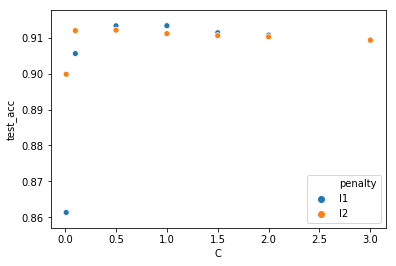

In [101]:
sns.scatterplot(data=df_result_v1, x="C", y ="test_acc", hue="penalty")

**Brief summary**
- Logistic regression seems to perform well around C=0.5
- No big improvement depending on penalty

# Improve accuracy by Data Augmentation

In [139]:
data_augmenter = ImageDataGenerator(
                    rotation_range = 30,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    fill_mode = "nearest")

## Augmentation test with single image

(-0.5, 27.5, 27.5, -0.5)

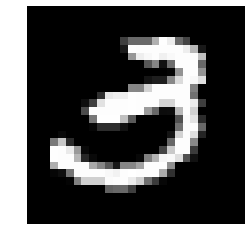

In [191]:
# Original data
rnd_idx = np.random.randint(len(X_train_org))
X_sample = X_train_org[[rnd_idx]]
plt.imshow(X_sample[0], cmap="gray")
plt.axis('off')

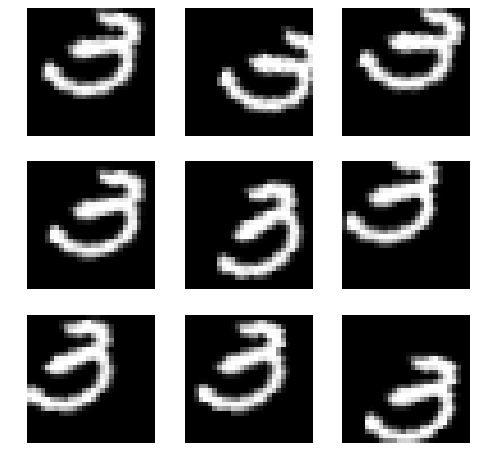

In [192]:
plt.figure(figsize=(8,8))
for i, X_batch in enumerate(data_augmenter.flow(X_sample[:,:,:,np.newaxis])):
    if i ==9:
        break
    plt.subplot(3,3,i+1)
    plt.imshow(X_batch[0,:,:,0], cmap="gray")
    plt.axis('off')
plt.show()

## Augmentation test with multiple images

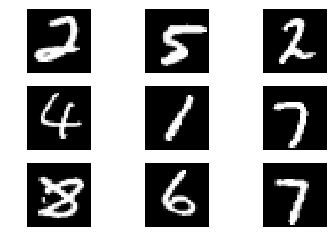

In [189]:
# Original data
X_sample = X_train_org[0:9]
for i, X in enumerate(X_sample):
    plt.subplot(3,3,i+1)
    plt.imshow(X, cmap="gray")
    plt.axis('off')

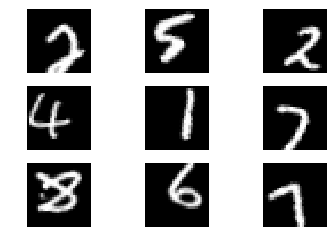

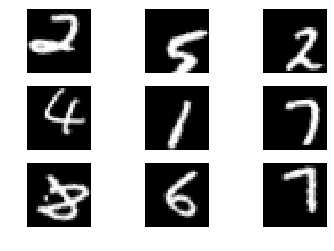

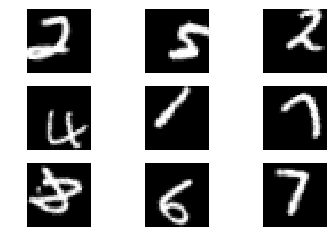

In [190]:
for i, X_batch in enumerate(data_augmenter.flow(X_sample[:,:,:,np.newaxis], shuffle=False, batch_size=12)):
    if i ==3:
        break
    for j, X in enumerate(X_batch):
        plt.subplot(3,3,j+1)
        plt.imshow(X[:,:,0], cmap="gray")
        plt.axis('off')
    plt.show()

## Perform augmentation

In [168]:
X_train_augmented = X_train_org[:,:,:,np.newaxis].copy()
y_train_augmented = y_train_org.copy()

for i, (X_batch, y_batch) in enumerate(data_augmenter.flow(X_train_org[:,:,:,np.newaxis], y_train_org, 
                                                           batch_size=len(X_train_org), shuffle=False)):
    if i ==2:
        break
    X_train_augmented = np.r_[X_train_augmented, X_batch]
    y_train_augmented = np.r_[y_train_augmented, y_batch]

In [169]:
# Check shape of augmented data
print("X_train_augmented.shape: {}".format(X_train_augmented.shape))
print("y_train_augmented.shape: {}".format(y_train_augmented.shape))

X_train_augmented.shape: (102321, 28, 28, 1)
y_train_augmented.shape: (102321,)


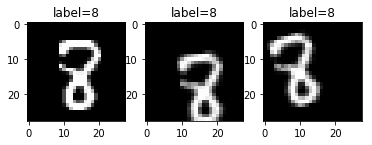

In [187]:
# Check images
org_img_num = len(X_train_org)
rnd_idx = np.random.randint(org_img_num)
group_idx = [org_img_num*idx + rnd_idx for idx in range(3)]

for i, show_idx in enumerate(group_idx):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train_augmented[show_idx,:,:,0], cmap="gray")
    plt.title("label={}".format(y_train_augmented[show_idx]))
plt.show()

## Reshape augmented images for logistic regression input

In [193]:
# Scale X data into range 0.0 to 1.0
X_train_augscaled = (X_train_augmented / 255.).reshape(-1, 28*28)
y_train_augscaled = y_train_augmented.copy().reshape(-1,1)
print("X_train_augscaled.shape: {}".format(X_train_augscaled.shape))
print("y_train_augscaled.shape: {}".format(y_train_augscaled.shape))

X_train_augscaled.shape: (102321, 784)
y_train_augscaled.shape: (102321, 1)


## GridSearch with augmented images

In [194]:
# Estimator
logistic_reg = LogisticRegression()

# Parameters
params_v2 = {
    "penalty": ["l2"],
    "C": [0.01, 0.1, 0.5, 1.0, 1.5],
}

# Gridsearch and Validation options
scoring = ["accuracy"]

cv = 5
refit = False
return_train_score = True
verbose = 3

In [195]:
grid_search_v2 = GridSearchCV(
                    logistic_reg,
                    params_v2,
                    scoring = scoring,
                    cv = cv,
                    refit = refit,
                    return_train_score = return_train_score,
                    verbose = verbose)

In [196]:
grid_search_v2.fit(X_train_augscaled, y_train_augscaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01, penalty=l2 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, penalty=l2, accuracy=0.7682724252491694, total= 1.4min
[CV] C=0.01, penalty=l2 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, penalty=l2, accuracy=0.6462598329017443, total= 1.2min
[CV] C=0.01, penalty=l2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, penalty=l2, accuracy=0.3037529319781079, total= 1.2min
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.01, penalty=l2, accuracy=0.310218443043542, total= 1.3min
[CV] C=0.01, penalty=l2 ..............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, penalty=l2, accuracy=0.3071997653844274, total= 1.3min
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, penalty=l2, accuracy=0.7516611295681063, total= 2.4min
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, penalty=l2, accuracy=0.6391263985928568, total= 2.3min
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, penalty=l2, accuracy=0.31919468334636436, total= 2.3min
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, penalty=l2, accuracy=0.32175145384352244, total= 2.2min
[CV] C=0.1, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, penalty=l2, accuracy=0.31981035241214134, total= 2.4min
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, penalty=l2, accuracy=0.7406195036153996, total= 5.7min
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, penalty=l2, accuracy=0.6345824986563737, total= 7.6min
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, penalty=l2, accuracy=0.3208072713057076, total= 6.9min
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, penalty=l2, accuracy=0.3222401407418267, total= 5.8min
[CV] C=0.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, penalty=l2, accuracy=0.3218632386724669, total= 5.9min
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.0, penalty=l2, accuracy=0.7381278092632402, total= 7.8min
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.0, penalty=l2, accuracy=0.6335564567352323, total= 7.7min
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.0, penalty=l2, accuracy=0.3205140734949179, total= 4.6min
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.0, penalty=l2, accuracy=0.3225822215706397, total= 3.6min
[CV] C=1.0, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=1.0, penalty=l2, accuracy=0.321032308519478, total= 3.7min
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.5, penalty=l2, accuracy=0.7378835255032246, total= 5.1min
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.5, penalty=l2, accuracy=0.6328235696487028, total= 5.2min
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.5, penalty=l2, accuracy=0.3205629397967162, total= 4.8min
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.5, penalty=l2, accuracy=0.3224356155011484, total= 5.5min
[CV] C=1.5, penalty=l2 ...............................................


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=1.5, penalty=l2, accuracy=0.3207390390537172, total= 5.0min


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 103.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'C': [0.01, 0.1, 0.5, 1.0, 1.5]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['accuracy'], verbose=3)

In [212]:
params = grid_search_v2.cv_results_['params']
accuracy_list = grid_search_v2.cv_results_['mean_test_accuracy']

result_list_v2 = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list_v2.append(param)

In [214]:
df_result_v2 = pd.DataFrame(result_list_v2)

In [215]:
df_result_v2

,C,penalty,test_acc
0,0.01,l2,0.467167
1,0.10,l2,0.470334
2,0.50,l2,0.468047
3,1.00,l2,0.467187
4,1.50,l2,0.466913


/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


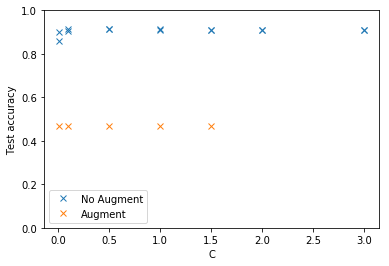

In [238]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_ylim([0, 1.0])
ax.set_xlabel("C")
ax.set_ylabel("Test accuracy")
ax.plot('C', 'test_acc', data=df_result_v1, label='No Augment', marker="x", linestyle="none")
ax.plot('C', 'test_acc', data=df_result_v2, label='Augment', marker="x", linestyle="none")
plt.legend()